In [13]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
(x_train, y_train), (x_test, y_test) = data

In [11]:
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)

In [5]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

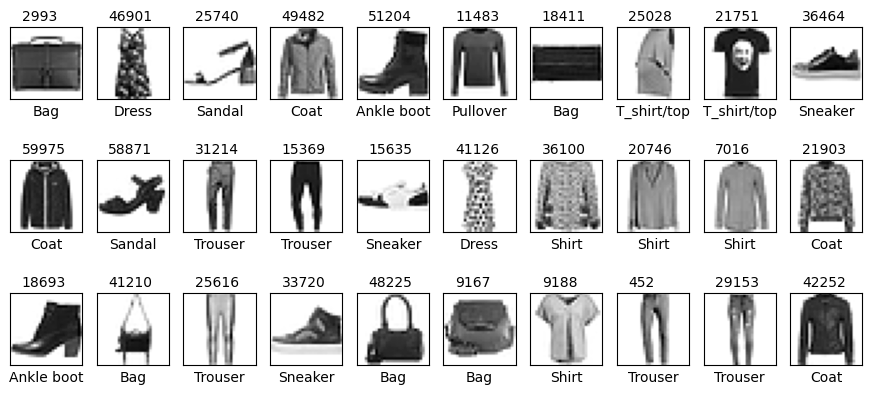

In [6]:
plt.figure(figsize=(11,17))
random_choice = np.random.randint(0, x_train.shape[0], size=30, dtype=int)
for i, index in enumerate(random_choice):
    plt.subplot(10,10,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[index], cmap='binary')
    plt.xlabel(class_names[y_train[index]])
    plt.text(x=4, y=-3, s=index)
plt.show()

In [7]:
model_dense = Sequential()
model_dense.add(Flatten(input_shape=(28, 28)))
model_dense.add(Dense(64, activation="relu"))
model_dense.add(Dense(32, activation="softplus"))
model_dense.add(Dense(16, activation="softmax"))
model_dense.add(Dense(10, activation="softmax"))
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model_dense.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model_dense.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3928 - accuracy: 0.5803
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8750 - accuracy: 0.6662
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6911 - accuracy: 0.7333
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5876 - accuracy: 0.7964
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5000 - accuracy: 0.8585
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4331 - accuracy: 0.8730
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3946 - accuracy: 0.8801
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3673 - accuracy: 0.8859
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3469 - accuracy: 0.8908
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - l

In [10]:
model_dense.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5617 - accuracy: 0.8778


[0.5617329478263855, 0.8777999877929688]